# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3
2 [WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/1.50m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/1.75m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/2.00m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/2.25m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/2.50m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/2.75m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_1_new3/3.00m')]


In [3]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
dataset = pd.concat(df_list, ignore_index = True)

folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m00.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m02.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m04.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m06.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m08.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m10.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m12.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m14.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m16.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m18.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m20.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_1_new3\1.50m\1.50m22.5kg


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55559 entries, 0 to 55558
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               55559 non-null  float64
 1   Standoff distance  55559 non-null  float64
 2   Angle              55559 non-null  int64  
 3   Time               55559 non-null  float64
 4   Phase              55559 non-null  object 
 5   Pressure           55559 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ MB


In [5]:
dataset['Phase'] = dataset['Phase'].replace({'negative_increasing': 'negative', 'negative_decreasing': 'negative'})
dataset = pd.get_dummies(dataset, columns =['Phase'], dtype = np.uint8)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55559 entries, 0 to 55558
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               55559 non-null  float64
 1   Standoff distance  55559 non-null  float64
 2   Angle              55559 non-null  int64  
 3   Time               55559 non-null  float64
 4   Pressure           55559 non-null  float64
 5   Phase_negative     55559 non-null  uint8  
 6   Phase_positive     55559 non-null  uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 2.2 MB


In [6]:
dataset.head(30)

,Mass,Standoff distance,Angle,Time,Pressure,Phase_negative,Phase_positive
0,0.5,1.5,0,1.465171,564.29260,0,1
1,0.5,1.5,0,1.467252,564.05780,0,1
2,0.5,1.5,0,1.469334,563.32560,0,1
3,0.5,1.5,0,1.473498,560.48900,0,1
4,0.5,1.5,0,1.481826,549.75170,0,1
5,0.5,1.5,0,1.517147,472.15140,0,1
6,0.5,1.5,0,1.525413,457.14590,0,1
7,0.5,1.5,0,1.535697,442.17030,0,1
8,0.5,1.5,0,1.558011,415.68570,0,1
9,0.5,1.5,0,1.615291,353.68080,0,1


In [7]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(55559, 6) (55559,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:4] = sc.fit_transform(X_train[:, 0:4])
print (X_train)

[[-0.36269004 -0.52145157 -0.44441782 -0.67104328  0.          1.        ]
 [-1.53923008 -1.02418722  1.37366749 -0.26694703  1.          0.        ]
 [-0.16660003 -0.52145157 -1.35346048 -0.65969155  0.          1.        ]
 ...
 [-0.16660003  0.98675539 -0.44441782  1.77036442  1.          0.        ]
 [ 0.22557998  0.98675539  0.46462483 -0.58070736  0.          1.        ]
 [-0.55878005 -1.52692287  0.46462483 -0.70672769  0.          1.        ]]


In [12]:
X_test[:,0:4] = sc.transform(X_test[:,0:4])
print (X_test)

[[ 1.00994     0.48401974 -1.35346048 -0.89997439  0.          1.        ]
 [-1.93141009 -1.52692287 -1.35346048 -0.75851636  0.          1.        ]
 [ 0.22557998  1.48949105  1.37366749 -0.37821042  0.          1.        ]
 ...
 [ 0.02948997 -0.01871591 -0.44441782 -0.51644526  0.          1.        ]
 [ 1.20603001 -0.52145157 -0.44441782  0.94198323  1.          0.        ]
 [-0.16660003 -0.01871591  1.37366749 -0.39420937  0.          1.        ]]


In [13]:
X_val[:,0:4] = sc.transform(X_val[:,0:4])
print (X_val)

[[-0.55878005 -0.01871591 -0.44441782 -0.5825112   0.          1.        ]
 [-1.14705006 -0.52145157  0.46462483 -0.08074981  1.          0.        ]
 [-0.75487005  1.48949105  1.37366749 -0.22377807  0.          1.        ]
 ...
 [ 0.61775999  0.48401974 -0.44441782 -0.54628658  0.          1.        ]
 [-0.75487005 -1.52692287 -1.35346048  0.34884443  1.          0.        ]
 [ 0.42166998  0.98675539  0.46462483 -0.76600267  0.          1.        ]]


In [14]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 33335
X_test 11112
X_val 11112


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=250,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=225,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=200,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=175,
                              activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               1750      
                                                                 
 dense_1 (Dense)             (None, 225)               56475     
                                                                 
 dense_2 (Dense)             (None, 200)               45200     
                                                                 
 dense_3 (Dense)             (None, 175)               35175     
                                                                 
 dense_4 (Dense)             (None, 1)                 176       
                                                                 
Total params: 138,776
Trainable params: 138,776
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
1112/1112 [==============================] - 34s 30ms/step - loss: 1993852.2500 - mae: 573.5709 - val_loss: 719826.4375 - val_mae: 321.7490
Epoch 2/500
1112/1112 [==============================] - 7s 6ms/step - loss: 699392.1250 - mae: 297.4911 - val_loss: 475263.2500 - val_mae: 295.9214
Epoch 3/500
1112/1112 [==============================] - 6s 6ms/step - loss: 392099.0000 - mae: 202.4901 - val_loss: 540789.5625 - val_mae: 242.6955
Epoch 4/500
1112/1112 [==============================] - 8s 7ms/step - loss: 385214.4688 - mae: 205.8810 - val_loss: 262831.1250 - val_mae: 247.1872
Epoch 5/500
1112/1112 [==============================] - 7s 6ms/step - loss: 306430.1875 - mae: 181.6105 - val_loss: 195635.7969 - val_mae: 134.0436
Epoch 6/500
1112/1112 [==============================] - 8s 7ms/step - loss: 298050.6875 - mae: 175.6694 - val_loss: 151937.0312 - val_mae: 133.9194
Epoch 7/500
1112/1112 [==============================] - 8s 7ms/step - loss: 323764.2500 - mae: 184.377

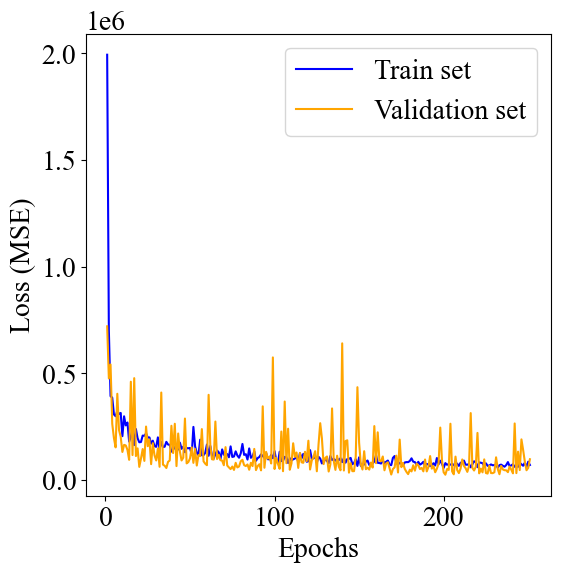

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section1_ANN2_2.png', dpi=200, bbox_inches='tight')
plt.show()

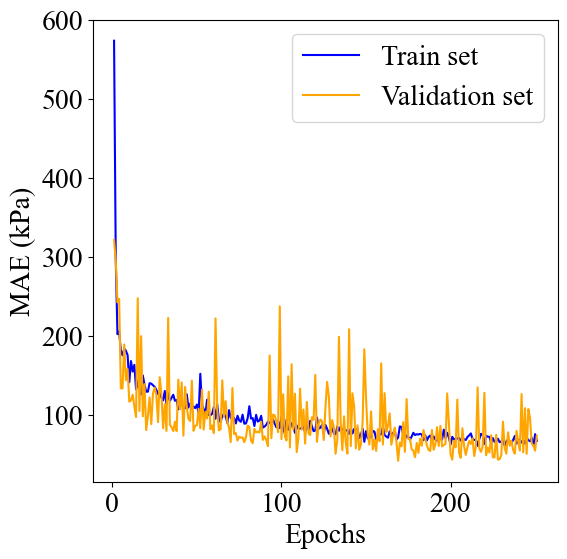

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (kPa)')
plt.legend()
plt.savefig('Section1_ANN2_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [24]:
ann.save('Section1_new3_ANN_2')
import pickle
pickle.dump(sc, open('Section1_new3_scaler_ANN_2.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section1_new3_ANN_2\assets


## Part 5 - Make predictions

348/348 [==============================] - 2s 4ms/step


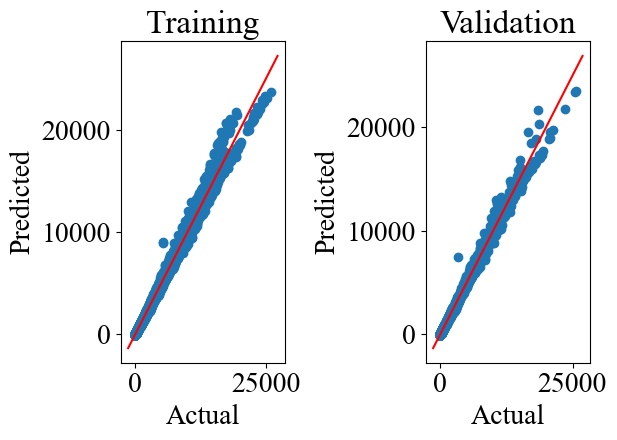

In [25]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=20)
axes[0].set_ylabel("Predicted",  fontsize=20)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=20)
axes[1].set_ylabel("Predicted",  fontsize=20)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Section1_ANN2_1.png', dpi=200, bbox_inches='tight')
# show the plot
plt.show()

In [26]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

348/348 [==============================] - 1s 3ms/step
[[ 8.39e+03  8.65e+03]
 [ 1.41e+02  1.84e+02]
 [ 5.01e+02  5.02e+02]
 ...
 [ 1.16e+00  4.37e+00]
 [-6.28e+01 -6.46e+01]
 [ 6.25e+01  7.16e+01]]


Text(0, 0.5, 'Predicted data')

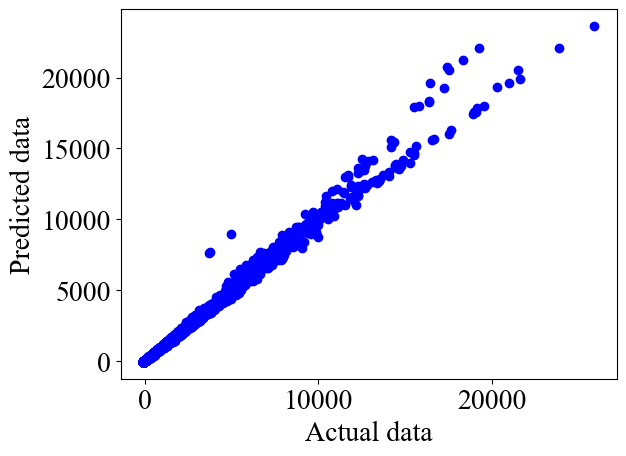

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

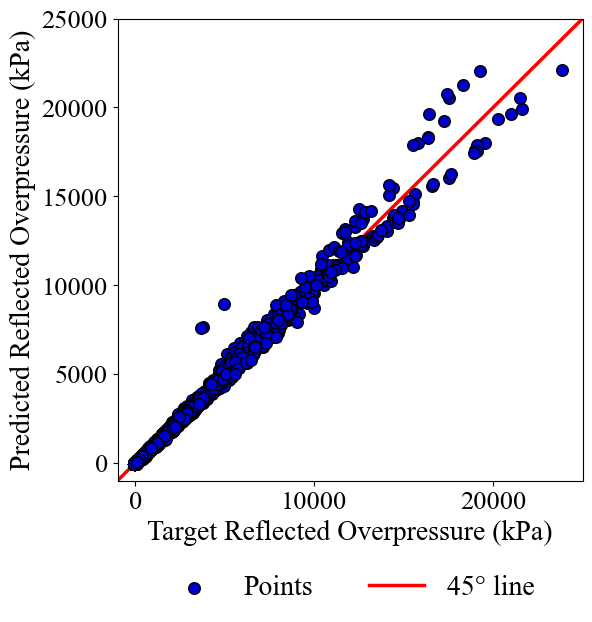

In [36]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

b_l = -1000
u_l = 25000

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Reflected Overpressure (kPa)')
plt.xlabel('Target Reflected Overpressure (kPa)')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
#plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Section1_ANN2.png', dpi=200, bbox_inches='tight')

In [29]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

1042/1042 [==============================] - 3s 2ms/step
42.99569055017959
41.269159049978406


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9933954344075077


In [31]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9945374134403758


In [32]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 22.27%
Within 10% margin 36.37%
Within 20% margin 46.70%
Out of 20% margin 53.30%


In [33]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9933918659794523


In [34]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

155.132326106678

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

41.269159049978406